In [1]:
import pandas as pd
import numpy as np 
from numpy import array
import matplotlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import array
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers import ConvLSTM2D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt
import time
from sklearn.preprocessing import MinMaxScaler
import math
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [4]:
columns = ['steps']
df = pd.read_csv(r'C:\Users\AyanC\OneDrive - Universitetet i Agder\Kalman\p01_merged_multi.csv')

#columns = ['Steps']
#df = pd.read_csv(r'C:\Users\AyanC\OneDrive - Universitetet i Agder\ayanca\activity_data\Mox2-5\Classification_paper_daily_30_days\P11_MOX_result.csv')

df = df[columns]
test_set = df
#df

In [5]:
training_set = df.values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
x_train = []
y_train = []

In [7]:
train_size = int(len(training_set) * 0.8)
timestamp = len(training_set) - train_size

print (train_size, timestamp)

121 31


In [8]:
length = len(training_set)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
n_steps = x_train.shape[1]
x_train = np.reshape(x_train, (x_train.shape[0], n_steps, 1))
n_features = 1
n_steps

31

In [11]:
def vanilla_LSTM(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse',  metrics=['acc'])    #model.compile(loss='mae', optimizer='adam')
    return model

def vanilla_GRU(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(GRU(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse',  metrics=['acc'])    #model.compile(loss='mae', optimizer='adam')
    return model

def stacked_LSTM(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['acc'])
    return model

def stacked_GRU(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(GRU(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['acc'])
    return model

def bidirectional_LSTM(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['acc'])
    return model

def bidirectional_GRU(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(Bidirectional(GRU(100, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['acc'])
    return model

def mul_layer_1_LSTM(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(units = 100, return_sequences = True, input_shape = (n_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 100, return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['acc'])
    return model

def mul_layer_1_GRU(n_steps, n_features):
    model = Sequential()
    model.add(GRU(units = 100, return_sequences = True, input_shape = (n_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(GRU(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 100, return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['acc'])
    return model

def mul_layer_2_LSTM(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(units = 100, return_sequences = True, input_shape = (n_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 100, return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'ADAM', loss = 'mse', metrics=['acc'])
    return model

def mul_layer_2_GRU(n_steps, n_features):
    model = Sequential()
    model.add(GRU(units = 100, return_sequences = True, input_shape = (n_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(GRU(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 100, return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'ADAM', loss = 'mse', metrics=['acc'])
    return model

def mul_layer_3_LSTM(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['acc'])
    return model

def mul_layer_3_GRU(n_steps, n_features):
    model = Sequential()
    model.add(GRU(units = 50, return_sequences = True, input_shape = (n_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(GRU(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 50, return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['acc'])
    return model

def cnn_1d(n_steps, n_features):    
    model = Sequential()
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    #model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    #model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    #model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D())
    #model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['acc'])
    return model
'''
'''
def cnn_LSTM(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def cnn_GRU(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def conv_LSTM(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(None, 1, n_steps, n_features)))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def mse_test(X, y, model, split = 0.2):
	X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
	history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data=(X_test, y_test), verbose= 2, shuffle=False)
	loss = (statistics.mean(history.history['loss']))
	val_loss = (statistics.mean(history.history['val_loss']))    
	
	# summarize history for loss
	pyplot.plot(history.history['loss'])
	pyplot.plot(history.history['val_loss'])
	pyplot.title('Model loss')
	pyplot.ylabel('Loss')
	pyplot.xlabel('Epoch')
	pyplot.legend(['Train', 'Test'], loc='upper left')
	pyplot.show()
    
	return loss, val_loss


In [12]:
#model = vanilla_LSTM(n_steps, n_features) 
#model = stacked_LSTM(n_steps, n_features) 
model = bidirectional_LSTM(n_steps, n_features) 

#model = vanilla_GRU(n_steps, n_features) 
#model = stacked_GRU(n_steps, n_features) 
#model = bidirectional_GRU(n_steps, n_features) 

#model = mul_layer_1_LSTM(n_steps, n_features) 
#model = mul_layer_2_LSTM(n_steps, n_features) 
#model = mul_layer_3_LSTM(n_steps, n_features) 
#model = cnn_1d(n_steps, n_features)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 200)               81600     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# fit model
history = model.fit(x_train, y_train, epochs = 200, batch_size = 50, validation_split = 0.05, callbacks = [rlrop])

Epoch 1/200
3/3 [==============================] - 2s 144ms/step - loss: 0.1897 - acc: 0.0088 - val_loss: 0.0601 - val_acc: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 25ms/step - loss: 0.1270 - acc: 0.0088 - val_loss: 0.0401 - val_acc: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0806 - acc: 0.0088 - val_loss: 0.0310 - val_acc: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0472 - acc: 0.0088 - val_loss: 0.0426 - val_acc: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 32ms/step - loss: 0.0449 - acc: 0.0088 - val_loss: 0.0567 - val_acc: 0.0000e+00
Epoch 6/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0475 - acc: 0.0088 - val_loss: 0.0450 - val_acc: 0.0000e+00
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0400 - acc: 0.0088 - val_loss: 0.0379 - val_acc: 0.0000e+00
Epoch 8/200
3/3 [==============================] - 0s 25ms/st

Epoch 62/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0383 - acc: 0.0088 - val_loss: 0.0384 - val_acc: 0.0000e+00
Epoch 63/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0382 - acc: 0.0088 - val_loss: 0.0383 - val_acc: 0.0000e+00
Epoch 64/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0382 - acc: 0.0088 - val_loss: 0.0384 - val_acc: 0.0000e+00
Epoch 65/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0382 - acc: 0.0088 - val_loss: 0.0391 - val_acc: 0.0000e+00
Epoch 66/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0383 - acc: 0.0088 - val_loss: 0.0392 - val_acc: 0.0000e+00
Epoch 67/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0382 - acc: 0.0088 - val_loss: 0.0381 - val_acc: 0.0000e+00
Epoch 68/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0383 - acc: 0.0088 - val_loss: 0.0375 - val_acc: 0.0000e+00
Epoch 69/200
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 17ms/step - loss: 0.0376 - acc: 0.0088 - val_loss: 0.0388 - val_acc: 0.0000e+00
Epoch 123/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0376 - acc: 0.0088 - val_loss: 0.0389 - val_acc: 0.0000e+00
Epoch 124/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0375 - acc: 0.0088 - val_loss: 0.0389 - val_acc: 0.0000e+00
Epoch 125/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0375 - acc: 0.0088 - val_loss: 0.0388 - val_acc: 0.0000e+00
Epoch 126/200
3/3 [==============================] - 0s 26ms/step - loss: 0.0375 - acc: 0.0088 - val_loss: 0.0387 - val_acc: 0.0000e+00
Epoch 127/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0376 - acc: 0.0088 - val_loss: 0.0387 - val_acc: 0.0000e+00
Epoch 128/200
3/3 [==============================] - 0s 30ms/step - loss: 0.0375 - acc: 0.0088 - val_loss: 0.0390 - val_acc: 0.0000e+00
Epoch 129/200
3/3 [==============================] - 0s 16ms/s

3/3 [==============================] - 0s 15ms/step - loss: 0.0374 - acc: 0.0088 - val_loss: 0.0392 - val_acc: 0.0000e+00
Epoch 183/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0374 - acc: 0.0088 - val_loss: 0.0394 - val_acc: 0.0000e+00
Epoch 184/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0374 - acc: 0.0088 - val_loss: 0.0395 - val_acc: 0.0000e+00
Epoch 185/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0375 - acc: 0.0088 - val_loss: 0.0397 - val_acc: 0.0000e+00
Epoch 186/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0375 - acc: 0.0088 - val_loss: 0.0396 - val_acc: 0.0000e+00
Epoch 187/200
3/3 [==============================] - 0s 28ms/step - loss: 0.0375 - acc: 0.0088 - val_loss: 0.0397 - val_acc: 0.0000e+00
Epoch 188/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0374 - acc: 0.0088 - val_loss: 0.0396 - val_acc: 0.0000e+00
Epoch 189/200
3/3 [==============================] - 0s 15ms/s

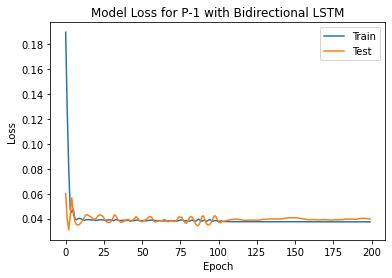

In [14]:
#test model
#loss, val_loss = mse_test(x_train, y_train, model, 0.2)
#print (loss, val_loss)

# Loss History
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model Loss for P-1 with Bidirectional LSTM')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Test'], loc='upper right')
pyplot.savefig('Pmdata_model_01.png', dpi=300)
pyplot.show()

In [15]:
y_test = test_set.iloc[timestamp:].values

cases = (test_set.values).reshape(-1, 1)
cases_scaled = sc.transform(cases)

In [16]:
# the model will predict the values on x_test
x_test = [] 
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(cases_scaled[i-timestamp:i, 0])
    
x_test = np.array(x_test)
print (x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], n_steps, 1))

(121, 31)


In [17]:
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

compilation time :  216.08376502990723
Test MAE: 3133.197
Test MSE: 15173319.558
Test RMSE: 3895.295
Test FE: 207.297
Test R2: -14.287
Test RSD: 3927.892


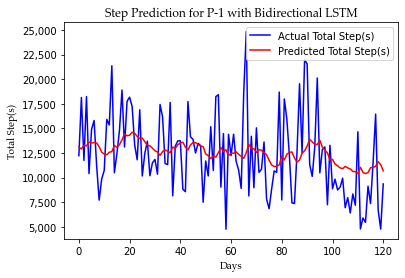

In [18]:
start = time.time()
y_pred = model.predict(x_test)
#print(y_pred)
print ('compilation time : ', (time.time() - start)*1000.0)

predicted_value = sc.inverse_transform(y_pred)
#print(predicted_value)

# calculate Metric
mae = mean_absolute_error(predicted_value, y_test)
mse = mean_squared_error(predicted_value, y_test)
rmse = sqrt(mean_squared_error(predicted_value, y_test))
forecast_error = np.mean(np.subtract(predicted_value, y_test))
#https://www.investopedia.com/terms/r/residual-standard-deviation.asp
rsd = RSE(y_test, predicted_value)

#r2_value = r2_score(predicted_value, y_test,multioutput='variance_weighted')
r2_value = r2_score(predicted_value, y_test)
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test FE: %.3f' % forecast_error)
print('Test R2: %.3f' % r2_value)
print('Test RSD: %.3f' % rsd)

#print (predicted_value)

# plotting the results
fig, ax = pyplot.subplots()
pyplot.plot(y_test, color = 'blue', label = 'Actual Total Step(s)')
pyplot.plot(predicted_value, color = 'red', label = 'Predicted Total Step(s)')
#plt.title('Case Prediction - mul_layer_3 Model')
#plt.xlabel('Time')
#plt.ylabel('Total Case(s)')
ax.set_xlabel('Days', fontname="Palatino Linotype")
ax.set_ylabel('Total Step(s)', fontname="Palatino Linotype")
ax.set_title('Step Prediction for P-1 with Bidirectional LSTM',fontname="Palatino Linotype")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
pyplot.legend(loc='upper right')
pyplot.savefig('PMData_Model_01.png', dpi=300)
pyplot.show()

In [19]:
#score, acc = model.evaluate(x_train, y_train, batch_size=50)
#print('Test accuracy:', acc)

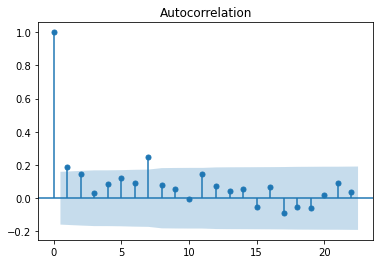

<Figure size 432x288 with 0 Axes>

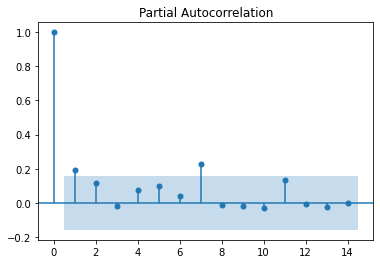

predicted=12974.112405, expected=21553.000000
predicted=17127.058453, expected=11335.000000
predicted=16483.384046, expected=10117.000000
predicted=13785.452751, expected=13093.000000
predicted=15285.643737, expected=20119.000000
predicted=18085.285670, expected=10480.000000
predicted=14914.807062, expected=12847.000000
predicted=11554.238448, expected=13115.000000
predicted=13309.771380, expected=7240.000000
predicted=13242.114487, expected=13280.000000
predicted=12120.907659, expected=8855.000000
predicted=11682.888341, expected=9835.000000
predicted=10728.758696, expected=8744.000000
predicted=9833.123468, expected=9026.000000
predicted=9811.982385, expected=9937.000000
predicted=10007.692397, expected=6939.000000
predicted=8992.552261, expected=7952.000000
predicted=8386.949301, expected=6403.000000
predicted=8224.783819, expected=8331.000000
predicted=8289.335633, expected=7189.000000
predicted=7987.322740, expected=14653.000000
predicted=9177.411287, expected=4773.000000
predicte

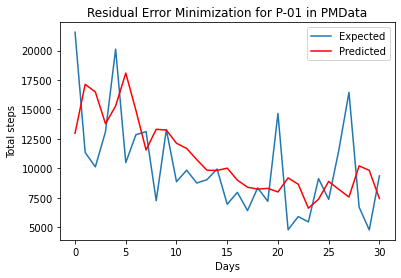

compilation time :  561.1162185668945


In [20]:
start = time.time()
#print(y_pred)

# load data
steps = df['steps'].values
#steps = df['Steps'].values
series=pd.Series(steps)

#AutoCorrelation Function
plot_acf(series)
pyplot.show()
pyplot.savefig('AR_acf', dpi=300)

#Partial autocorrelation function
#plot_pacf(series, lags=50)
plot_pacf(series, lags=14)
pyplot.show()
pyplot.savefig('AR_pacf', dpi=300)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.8)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
window = 5
model = AutoReg(train_resid, lags=5)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
    
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
        
	# correct the prediction
	yhat = yhat + pred_error
	predictions.append(yhat)
	history.append(error)
	print('predicted=%f, expected=%f' % (yhat, test_y[t]))

#RSD
rsd = RSE(y_test, predicted_value)
print('Test RSD: %.3f' % rsd)
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

forecast_error = np.mean(np.subtract(predicted_value, y_test))
print('Test fe: %.3f' % forecast_error)

r2_value = r2_score(predicted_value, y_test)
print('Test r2: %.3f' % r2_value)

# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.title('Residual Error Minimization for P-01 in PMData')
pyplot.ylabel('Total steps')
pyplot.xlabel('Days')
pyplot.legend(['Expected', 'Predicted'], loc='upper right')
pyplot.savefig('AR_REM_PMData_01.png', dpi=300)
pyplot.show()

print ('compilation time : ', (time.time() - start)*1000.0)